# Learning a momentum strategy using SkLearn

In [1]:
#import the numerical libraries we shall need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime 
import math as m

In [2]:
#GDAX bitcoin exchange data
import cbpro
import dateutil.parser as dp

## Training Data

We retreive training data. Coinbase only allows us to grab 300 values at a time so we have to iterate and append the resulting dataframes.

In [3]:
#we are only allowed 300 days of data from the exchange
#using 600 to 300 days ago for training
#end_date= datetime.today()
today = datetime.today()
dates = []
nr = 3
end_date = today 
for l in range(0,nr):
  end_date = end_date - pd.DateOffset(days=300)
  start_date = end_date - pd.DateOffset(days=300)
  dates.append(end_date)
print("Training Start Date:",start_date)
print("Training End Date:", end_date)
dates.reverse()
dates

Training Start Date: 2016-11-05 11:04:32.335083
Training End Date: 2017-09-01 11:04:32.335083


[Timestamp('2017-09-01 11:04:32.335083'),
 Timestamp('2018-06-28 11:04:32.335083'),
 Timestamp('2019-04-24 11:04:32.335083')]

In [4]:
#get the data
client = cbpro.PublicClient() 
column_names = ["time", "low", "high","open","close","volume"]
result = pd.DataFrame(columns = column_names)
for l in range(nr-1,0,-1):
  #print(dates[l],dates[l-1])
  a = client.get_product_historic_rates('BTC-USD',granularity=86400, start=dates[l-1] ,end=dates[l])
  b2 = pd.DataFrame(a)
  b2.columns = [ 'time', 'low', 'high', 'open', 'close', 'volume' ]
  result = result.append(b2,ignore_index=True)
result['time'] = result['time'].apply(datetime.utcfromtimestamp)
result

,time,low,high,open,close,volume
0,2019-04-24,5374.00,5624.47,5532.75,5441.90,15137.832844
1,2019-04-23,5361.01,5650.01,5387.60,5532.75,18208.596525
2,2019-04-22,5250.45,5440.84,5297.64,5387.60,12286.705339
3,2019-04-21,5213.34,5349.16,5319.90,5297.64,5748.507325
4,2019-04-20,5260.24,5359.98,5290.37,5319.89,4905.682858
5,2019-04-19,5196.70,5359.47,5280.50,5290.36,6330.550808
6,2019-04-18,5222.26,5318.18,5227.00,5281.81,8234.199659
7,2019-04-17,5173.11,5272.32,5201.21,5227.00,7415.725812
8,2019-04-16,5016.45,5229.97,5029.99,5202.90,8624.244945
9,2019-04-15,4945.54,5193.01,5163.81,5029.99,10155.671461


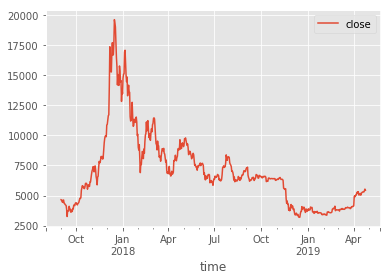

In [5]:
#plot out the training data
from matplotlib import style
resultstoplot = [result['time'],result['close']]
style.use("ggplot")
result.plot(x='time', y='close')
plt.show()

## Labelling 

We label the data as either hitting a volatility adjusted returns target (1) or not (0)
The labelling is done using the Triple Barrier Method outlined in Advances in Financial Machine Learning by Marcos Lopez de Prado.
This means that there is a set holding period (in this case 5 days), a profit taking level and a stop-loss level. The point is only labeled as a positive if it hits the return target before the end of the holding period or the position stops out. 

In [6]:
#assume a maximum holding period of 5 days
#target value of 0.1
hperiod = 5
close_price = result[['time','close']]
hbar = pd.DataFrame()
hbar[['t1']] = result[['time']] + pd.DateOffset(days=hperiod)
#find closet index of 
#hbar['trgt'] = 0.1
#close_price.set_index('time', inplace=True)
#hbar

In [7]:
returns = close_price['close'].pct_change()
a = returns.rolling(5).std()
vol = a.fillna(0.01)
#vol

In [8]:
from pandas.core.common import flatten
vol.reset_index(drop=True, inplace=True)
c = vol.values.tolist()

hbar['trgt']  = c
ptS1=[2,2]

In [9]:
labels = pd.DataFrame(np.zeros((len(close_price),1)))
labels.columns=['label']
nd =20
out = hbar[['t1']].copy(deep=True)
#Define barriers
if ptS1[0] > 0:pt = ptS1[0]*hbar['trgt']
else:pt =pd.Series(index=hbar.index) #NaNs
if ptS1[1] > 0:s1 = -ptS1[1]*hbar['trgt']
else:s1 = pd.Series(index=hbar.index)
#labels
l= 10
startdate = close_price['time'][l]
enddate = startdate + pd.DateOffset(days=nd)
df = close_price.loc[close_price['time'].between(startdate,enddate,inclusive=True)]
df0 = df.set_index('time')
df0 = (df0/ close_price['close'][l]-1)
dummytime = startdate+ pd.DateOffset(days=nd+1)
#upper barrier
gtseq = df0[df0['close'].gt(pt[l])].index
if (len(gtseq) == 0):
    out.loc[l,'pt'] = dummytime
else:
    index_value = min(df0[df0['close'].gt(pt[l])].index)
    out.loc[l,'pt'] = index_value
#lower barrier
ltseq = df0[df0['close'].lt(s1[l])].index
if (len(ltseq) == 0):
    out.loc[l,'sl'] = dummytime
else:
    index_value = min(df0[df0['close'].lt(s1[l])].index)
    out.loc[l,'sl'] = index_value
if (out.loc[l,'pt'] <= hbar.loc[l,'t1']) and (out.loc[l,'pt'] < out.loc[l,'sl']):
   labels.loc[l,'label'] = 1
elif(out.loc[l,'pt'] <= enddate):  
  #we would have hit the the bsarrier if we hadn't stopped out
   labels.loc[l,'label'] = 0  
else:
   #we did not hit the target position expired
   labels.loc[l,'label'] = 0 

An example of a point where the returns exceed the required amount before the end of the holding period or the position is stopped out.

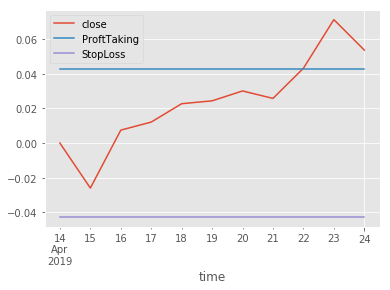

In [10]:
df0
df1=df0.assign(ProftTaking=pt[l])
df2= df1.assign(StopLoss=s1[l])
#resultstoplot2 = [df0.index,df0['close'],df0['ProftTaking'],df0['StopLoss']]
#resultstoplot2
style.use("ggplot")
df2.plot()
#plt.show()

Now we label all the training data

In [11]:
for l in range(0,len(close_price)):
    startdate = close_price['time'][l]
    enddate = startdate + pd.DateOffset(days=nd)
    df = close_price.loc[close_price['time'].between(startdate,enddate,inclusive=True)]
    df0 = df.set_index('time')
    df0 = (df0/ close_price['close'][l]-1)
    dummytime = startdate+ pd.DateOffset(days=nd+1)
    #upper barrier
    gtseq = df0[df0['close'].gt(pt[l])].index
    if (len(gtseq) == 0):
       out.loc[l,'pt'] = dummytime
    else:
       index_value = min(df0[df0['close'].gt(pt[l])].index)
       out.loc[l,'pt'] = index_value
    #lower barrier
    ltseq = df0[df0['close'].lt(s1[l])].index
    if (len(ltseq) == 0):
      out.loc[l,'sl'] = dummytime
    else:
      index_value = min(df0[df0['close'].lt(s1[l])].index)
      out.loc[l,'sl'] = index_value
    if (out.loc[l,'pt'] <= hbar.loc[l,'t1']) and (out.loc[l,'pt'] < out.loc[l,'sl']):
       labels.loc[l,'label'] = 1
    elif(out.loc[l,'pt'] <= enddate):  
       #we would have hit the the bsarrier if we hadn't stopped out
       labels.loc[l,'label'] = 0  
    else:
       #we did not hit the target position expired
       labels.loc[l,'label'] = 0 

In [12]:
y=labels

In [13]:
from talib import EMA

# Momentum strategy

A common momentum strategy is to buy when the short term (2d) running average is greater than the long term (8d) running average. We will see if the algorithm can learn this strategy

In [14]:
#result
long= 8
short = 2
short_ema = EMA(result['close'], timeperiod=short)
short_ema.fillna(short_ema[short+1], inplace=True)
long_ema  = EMA(result['close'], timeperiod=long)
long_ema.fillna(long_ema[long+1], inplace=True) 

In [15]:
X = result[['open','volume']]

In [16]:
print(type(short_ema))
X = X.assign(short_ema=short_ema)
X = X.assign(long_ema=long_ema)
X

<class 'pandas.core.series.Series'>


,open,volume,short_ema,long_ema
0,5532.75,15137.832844,5338.707222,5251.870231
1,5387.60,18208.596525,5487.325000,5251.870231
2,5297.64,12286.705339,5420.841667,5251.870231
3,5319.90,5748.507325,5338.707222,5251.870231
4,5290.37,4905.682858,5326.162407,5251.870231
5,5280.50,6330.550808,5302.294136,5251.870231
6,5227.00,8234.199659,5288.638045,5251.870231
7,5201.21,7415.725812,5247.546015,5347.368750
8,5029.99,8624.244945,5217.782005,5315.264583
9,5163.81,10155.671461,5092.587335,5251.870231


# Model

We use a Support Vector machine with regularisation to fit the data

https://en.wikipedia.org/wiki/Support-vector_machine

In [17]:
import sklearn
from sklearn import svm

In [18]:
#define models
#clf = svm.SVC(C=5)
clf = svm.SVC(C=20) # 50%
#clf = svm.SVC(C=20) # 60%

In [19]:
#convert to arrays
y1 = y.values
XA = X[['short_ema','long_ema']]
X1 = XA.values
yv = y1.flatten()
#yv = yv[lon:]

In [20]:
#scale mean and variance to (0,1)
from sklearn import preprocessing
X_scaled = preprocessing.scale(X1)

In [21]:
yv

array([0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 1.

The labelled data on a 2d scatterplot of the scaled features show distinct grouping suggesting that these features are useful. 

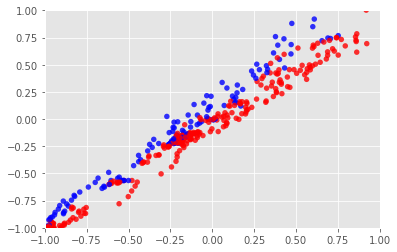

In [22]:
import matplotlib.pyplot as plt
colors = ("Red", "Blue")
groups = ("No bet", "Bet")
fig = plt.figure()
ax = fig.add_subplot()
plt.xlim([-1,1])
plt.ylim([-1,1])
xp= X_scaled[:,0]
yp = X_scaled[:,0]
for i in range(0,len(X_scaled)):
    xpp = X_scaled[i,0]
    ypp = X_scaled[i,1]
    if (yv[i] ==1):
        cc = colors[1]
        grp = groups[1]
    else:
        cc = colors[0]
        grp = groups[0]
    plt.scatter(xpp, ypp, alpha=0.8, c=cc, edgecolors='none', s=30, label=grp)        

In [23]:
clf.fit(X_scaled, yv)

SVC(C=20, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [24]:
y_predict = clf.predict(X_scaled)
y_predict

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

The prediction looks reasonable but we can get more colour by using some built in metrics. The precision,p is the
number of true positives divided by the overall number of positives (both true and false). The recall, r is the number of true positives over the combined number of true positives and false negatives. F1 is the harmonic mean of the two:

$F_1 = 2 \frac{p r}{p+r}$



In [25]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(yv, y_predict)
print('Average precision score: {0:0.2f}'.format(
      average_precision))

Average precision score: 0.64


In [26]:
from sklearn.metrics import f1_score
fr= f1_score(yv, y_predict, average=None)
print('F1 for 0: {0:0.2f}'.format(
      fr[0]))
print('F1 for 1: {0:0.2f}'.format(
      fr[1]))


F1 for 0: 0.89
F1 for 1: 0.68


The relatviely low precision suggests that the algorithm has learned the rule, but the rule produces quite a lot of false positives. We can add some additional features such as opening price and volume in order to try and discrimate more effectively. 

In [27]:
X1 = X.values
Xfull_scaled = preprocessing.scale(X1)
clf2 = svm.SVC(C=20)
clf2.fit(Xfull_scaled, yv)
y_predict_full = clf2.predict(Xfull_scaled)
average_precision = average_precision_score(yv, y_predict_full)
print('Average precision score: {0:0.2f}'.format(
      average_precision))
#Xfull_scaled

Average precision score: 0.64


The addition of these extra features does nor seem to significantly improve the precision 
suggesting they may not be useful

# Test Data

We run the model on more recent data to see if it can exhibit similar performance on data it has not seen before

In [28]:
#Test on last 300 hundred days
today = datetime.today()
end_date = today 
start_date = end_date - pd.DateOffset(days=300)
print(start_date)
print(end_date)

2019-04-24 11:05:12.463163
2020-02-18 11:05:12.463163


In [29]:
client = cbpro.PublicClient() 
a = client.get_product_historic_rates('BTC-EUR',granularity=86400, start=start_date ,end=end_date)
b2 = pd.DataFrame(a)
b2.columns = [ 'time', 'low', 'high', 'open', 'close', 'volume' ]
result = b2
result['time'] = result['time'].apply(datetime.utcfromtimestamp)
result

,time,low,high,open,close,volume
0,2020-02-18,8920.91,9086.00,8984.36,9022.80,510.853466
1,2020-02-17,8734.68,9196.40,9142.80,8984.36,2223.949451
2,2020-02-16,8841.24,9301.60,9158.71,9149.15,1361.133648
3,2020-02-15,9069.69,9597.00,9574.65,9159.98,1495.252693
4,2020-02-14,9340.00,9589.99,9457.45,9577.01,1257.797935
5,2020-02-13,9282.09,9700.00,9529.44,9458.31,2246.625026
6,2020-02-12,9400.01,9620.00,9419.91,9532.59,1788.950441
7,2020-02-11,8905.00,9485.00,9038.00,9419.90,2270.833950
8,2020-02-10,8914.59,9316.66,9280.44,9038.01,2230.429810
9,2020-02-09,9033.84,9297.99,9065.74,9283.65,1414.015974


In [30]:
hperiod = 5
close_price = result[['time','close']]
hbar = pd.DataFrame()
hbar[['t1']] = result[['time']] + pd.DateOffset(days=hperiod)

In [31]:
returns = close_price['close'].pct_change()
a = returns.rolling(5).std()
vol = a.fillna(0.01)

In [32]:
vol.reset_index(drop=True, inplace=True)
c = vol.values.tolist()

hbar['trgt']  = c
ptS1=[2,2]

In [33]:
test_labels = pd.DataFrame(np.zeros((len(close_price),1)))
test_labels.columns=['label']
for l in range(0,len(close_price)):
    startdate = close_price['time'][l]
    enddate = startdate + pd.DateOffset(days=nd)
    df = close_price.loc[close_price['time'].between(startdate,enddate,inclusive=True)]
    df0 = df.set_index('time')
    df0 = (df0/ close_price['close'][l]-1)
    dummytime = startdate+ pd.DateOffset(days=nd+1)
    #upper barrier
    gtseq = df0[df0['close'].gt(pt[l])].index
    if (len(gtseq) == 0):
       out.loc[l,'pt'] = dummytime
    else:
       index_value = min(df0[df0['close'].gt(pt[l])].index)
       out.loc[l,'pt'] = index_value
    #lower barrier
    ltseq = df0[df0['close'].lt(s1[l])].index
    if (len(ltseq) == 0):
      out.loc[l,'sl'] = dummytime
    else:
      index_value = min(df0[df0['close'].lt(s1[l])].index)
      out.loc[l,'sl'] = index_value
    if (out.loc[l,'pt'] <= hbar.loc[l,'t1']) and (out.loc[l,'pt'] < out.loc[l,'sl']):
       test_labels.loc[l,'label'] = 1
    elif(out.loc[l,'pt'] <= enddate):  
       #we would have hit the the bsarrier if we hadn't stopped out
       test_labels.loc[l,'label'] = 0  
    else:
       #we did not hit the target position expired
       test_labels.loc[l,'label'] = 0 

In [34]:
y=test_labels
y

,label
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,1.0
8,1.0
9,0.0


In [35]:
short_ema = EMA(result['close'], timeperiod=short)
short_ema.fillna(short_ema[short+1], inplace=True)
long_ema  = EMA(result['close'], timeperiod=long)
long_ema.fillna(long_ema[long+1], inplace=True) 

In [36]:
X = result[['open','volume']]
y1 = y.values
X1 = X.values
yv = y1.flatten()

In [37]:
X = X.assign(short_ema=short_ema)
X = X.assign(long_ema=long_ema)
X

,open,volume,short_ema,long_ema
0,8984.36,510.853466,9140.195556,9243.832747
1,9142.80,2223.949451,9003.580000,9243.832747
2,9158.71,1361.133648,9100.626667,9243.832747
3,9574.65,1495.252693,9140.195556,9243.832747
4,9457.45,1257.797935,9431.405185,9243.832747
5,9529.44,2246.625026,9449.341728,9243.832747
6,9419.91,1788.950441,9504.840576,9243.832747
7,9038.00,2270.833950,9448.213525,9288.012500
8,9280.44,2230.429810,9174.744508,9232.456389
9,9065.74,1414.015974,9247.348169,9243.832747


In [38]:
X_scaled = preprocessing.scale(X)

In [39]:
y_predict = clf2.predict(X_scaled)

In [40]:
y_predict

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [41]:
yv

array([0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 1.

In [42]:
average_precision = average_precision_score(yv, y_predict)
print('Average precision score: {0:0.2f}'.format(
      average_precision))

Average precision score: 0.64


In [43]:
from sklearn.metrics import f1_score
fr= f1_score(yv, y_predict, average=None)
print('F1 for 0: {0:0.2f}'.format(
      fr[0]))
print('F1 for 1: {0:0.2f}'.format(
      fr[1]))


F1 for 0: 0.86
F1 for 1: 0.72


The model gives a similar level of performance on the test set although it seems to still have some problems
with false positives